The data set given for the project is from " https://archive-beta.ics.uci.edu/ml/datasets/productivity+prediction+of+garment+employees " 
and is cited as Productivity Prediction of Garment Employees. (2020). UCI Machine Learning Repository. 
The data file is attached as csv file. The following are details being provided . The data contains details on actual productivty of a garment industry, the data has been recorded on a day to day basis from the year 2015 to almost year end of 2015. The data set at first needs to be examined and the structure of the data set needs to be understood. The data has been recorded in terms of the following details
Date 
Quarter (Four Quarters)
Department (Sewing and Finishing)
Day (Please note the way data is recorded is that based on a dept and productivity is recorded for various lines in each dept, hence you would find multiple productivity recorded for each combination of vairables such as team, dept, smv, date)
Team 
Targeted_Producitivity (Target which needs to be achieved)
SMV (Standard Minute Value) : Standard time for a Task in this case you can take standard time to complete a garment 
WIP (Work in progress)
Over_time
Incentive 
Idle_time
Idle_men (Idle workers)
no_of_style_change
no_of_workers
Actual_Producitivity

The aim is of this project is to obtain an understanding of the data and decipher the relationship among the variables, understanding what possible variables can affect producivity which can be whether overtime or team size or number of worker or department type or a day (like monday ect...) ect.. have an effect. 

Suppose the manager is interested in the following questions 

Exploratory Data Analysis & Descriptive Statistics 

1. Basic Summary statistics of the data for the numerical variables 
2. basic Summary of the data for the number of working days, count of quarters in the year
3. Mean and standard deviation of actual producivity for every quarter and Histogram plot of actual productivity based on every quarter and conclusion accordingly
4. Number count for sewing and finishing department 
5. Mean and standard deviation of actual producivity for sewing and finishing Histogram plot of actual productivity based on both department and conclusion accordingly
6. Number count for  teams, smv across the year
7. Histogram & Box plot of actual productivity based on all working days, team size, quarterts and  Conclude accordingly 
8. Find correlation matrix and draw heat map for all variables
9. Conclude (Is the company able to meet target, are they giving incentives based on producitivity, does overtime have any effect on productivity)
10. Find the correlation between actual and target productivity for every quarter and for every department. What do you conclude
11. Based on the above details of EDA and Descriptive statisitcs analysis what would you say could be the possible factors which can affect producitivity. 

Hypothesis Testing 

12. Test using Z test (take a random sample of more than 30 and assume sigma =.1) whether the finishing department has achieved more acheived producitivity than .75 for a standard deviation of .1. State your null and alternative hypothesis. alpha value is .05

13. Test using Z test(take a random sample of more than 30 and assume sigma =.1) whether the sewing department has achieved more producitivit than .75 for a standard deviation of .1. State your null and alternative hypothesis. alpha value is .05.

14. Conduct a two sample t test (take a random sample more than 30) to check whether the finishing department has achieved more actual productivtiy than sewing     department. State your null and alternative hypothesis 

15. Conduct a two sample t (take a random sample less than 30) test to check whether the finishing department has achieved obtained higher incentive than sewing department, state your null and alternative hypothesis. In case test fails for normality check, then take a sample more than 30. 

16. The manager has asked you to classifiy low productivity as less than .5, medium between .5 and less than .75 and higher
    as greater than or equal to .75. He believes that the percentage of  actual producvity  in  sewing departemnt for   
    person classified as low is 30%, for medium is 40% and for high is 30%. USing chi square test can you prove whether his 
    hypothesis is right or not 

17. Based on the EDA analysis the manager has decided to find out whether different quarters are having an impact on actual productivity. Assuming normality of data conduct an analysis accordingly Conduct an ANOVA for comparing productivity for Quarter1, Quarter2, Quarter3, Quarter 4 and accordingly conclude (Assume data is normally distributed)

18. Based on the EDA analysis the manager has decided to find out whether different days  are having an impact on actual productivity. Assuming normality of data conduct an analysis accordingly Conduct an ANOVA for comparing productivity for Quarter1, Quarter2, Quarter3, Quarter 4 and accordingly conclude (Assume data is normally distributed)

19. In case the manager is interested whether day and quarters have an impact on actual producitivity, provide an analysis and identify which factors play a role in affecting productivty

20. Based on 17 eliminate one of the variabes which is not significant and reconduct analysis using deparment as another variable, what do you conclude.

21. Based on EDA and Hypothesis would you aggree or disaggree with the finding, also in addition summarize the findings based on both analysis and provide a recommendation on what you can thinking on improving the producitivity. 



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import f_oneway
# import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

In [2]:
df = pd.read_csv('garments_worker_productivity+%282%29.csv')

__Understanding of Data__

In [3]:
df.shape

(1197, 15)

In [4]:
df.head(10)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,01-01-2015,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,01-01-2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,01-01-2015,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,01-01-2015,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,01-01-2015,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,01-01-2015,Quarter1,sewing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
6,01-01-2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
7,01-01-2015,Quarter1,sewing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683
8,01-01-2015,Quarter1,sewing,Thursday,2,0.75,19.87,733.0,6000,34,0.0,0,0,55.0,0.753098
9,01-01-2015,Quarter1,sewing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428


In [5]:
df.info()                                   # Looks like wip has some null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [6]:
df['smv'].value_counts().sort_values(ascending=False)

smv
3.94     192
2.90     108
22.52    103
30.10     79
4.15      76
        ... 
26.87      1
20.20      1
42.41      1
31.83      1
40.99      1
Name: count, Length: 70, dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
team,1197.0,6.426901,3.463963,1.000000,3.000000,6.000000,9.000000,12.000000
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
wip,691.0,1190.465991,1837.455001,7.000000,774.500000,1039.000000,1252.500000,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1197.0,34.609858,22.197687,2.000000,9.000000,34.000000,57.000000,89.000000


In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date,1197,59,03-11-2015,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quarter,1197,5,Quarter1,360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
department,1197,2,sewing,691,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,1197,6,Wednesday,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
team,1197.0,NaN,NaN,NaN,6.426901,3.463963,1.0,3.0,6.0,9.0,12.0
targeted_productivity,1197.0,NaN,NaN,NaN,0.729632,0.097891,0.07,0.7,0.75,0.8,0.8
smv,1197.0,NaN,NaN,NaN,15.062172,10.943219,2.9,3.94,15.26,24.26,54.56
wip,691.0,NaN,NaN,NaN,1190.465991,1837.455001,7.0,774.5,1039.0,1252.5,23122.0
over_time,1197.0,NaN,NaN,NaN,4567.460317,3348.823563,0.0,1440.0,3960.0,6960.0,25920.0
incentive,1197.0,NaN,NaN,NaN,38.210526,160.182643,0.0,0.0,0.0,50.0,3600.0


In [9]:
df['quarter'].unique()   # Quarter 5 is not correct. we need to derive it based on date

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

In [10]:
df[df['quarter'] == 'Quarter1']

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,01-01-2015,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,01-01-2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,01-01-2015,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,01-01-2015,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,01-01-2015,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,03-07-2015,Quarter1,sewing,Saturday,2,0.65,16.10,626.0,4200,0,0.0,0,1,45.0,0.650240
1102,03-07-2015,Quarter1,finishing,Saturday,8,0.80,4.60,NaN,3600,0,0.0,0,0,15.0,0.590741
1103,03-07-2015,Quarter1,finishing,Saturday,2,0.65,3.90,NaN,1920,0,0.0,0,0,8.0,0.528125
1104,03-07-2015,Quarter1,sewing,Saturday,6,0.50,23.41,1379.0,2280,0,0.0,0,1,39.0,0.500528


In [11]:
df[df['quarter'] == 'Quarter5']             # Date format is also different, we need to convert it to consistent date format

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
498,1/29/2015,Quarter5,sewing,Thursday,2,0.80,22.52,1416.0,6840,113,0.0,0,0,57.0,1.000230
499,1/29/2015,Quarter5,finishing,Thursday,4,0.80,4.30,NaN,1200,0,0.0,0,0,10.0,0.989000
500,1/29/2015,Quarter5,sewing,Thursday,3,0.80,22.52,1287.0,6840,100,0.0,0,0,57.0,0.950186
501,1/29/2015,Quarter5,sewing,Thursday,4,0.80,22.52,1444.0,6900,88,0.0,0,0,57.5,0.900800
502,1/29/2015,Quarter5,sewing,Thursday,10,0.80,22.52,1088.0,6720,88,0.0,0,0,56.0,0.900130
503,1/29/2015,Quarter5,finishing,Thursday,6,0.50,2.90,NaN,1200,0,0.0,0,0,10.0,0.899000
504,1/29/2015,Quarter5,finishing,Thursday,8,0.65,4.15,NaN,960,0,0.0,0,0,8.0,0.877552
505,1/29/2015,Quarter5,finishing,Thursday,11,0.60,2.90,NaN,960,0,0.0,0,0,8.0,0.864583
506,1/29/2015,Quarter5,finishing,Thursday,10,0.80,3.94,NaN,1200,0,0.0,0,0,10.0,0.856950
507,1/29/2015,Quarter5,finishing,Thursday,1,0.75,3.94,NaN,1200,0,0.0,0,0,10.0,0.853667


In [12]:
df['date'] = df['date'].apply(lambda x : x.replace('-','/'))      # Convert date in one format

In [13]:
df['date'] = pd.to_datetime(df['date'])                           # convert date to date type

In [14]:
df['quarter'].value_counts()                     # Quarter 5 is wrong, we need to derive it based on date

quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64

In [15]:
# Replace Quarter5 with correct  value
for index, row in df.iterrows():
    if row['quarter'] == 'Quarter5':
        df['quarter'][index] = 'Quarter'+str(row['date'].quarter)
        count = 0

C:\Users\Ravi\AppData\Local\Temp\ipykernel_12128\3519368986.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quarter'][index] = 'Quarter'+str(row['date'].quarter)
C:\Users\Ravi\AppData\Local\Temp\ipykernel_12128\3519368986.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quarter'][index] = 'Quarter'+str(row['date'].quarter)
C:\Users\Ravi\AppData\Local\Temp\ipykernel_12128\3519368986.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [16]:
df['quarter'].value_counts() 

quarter
Quarter1    404
Quarter2    335
Quarter4    248
Quarter3    210
Name: count, dtype: int64

In [17]:
df['day'].unique()       # It seems like Friday is not working for any of the team

array(['Thursday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
      dtype=object)

In [18]:
df['date'].unique()

<DatetimeArray>
['2015-01-01 00:00:00', '2015-01-03 00:00:00', '2015-01-04 00:00:00',
 '2015-01-05 00:00:00', '2015-01-06 00:00:00', '2015-01-07 00:00:00',
 '2015-01-08 00:00:00', '2015-01-10 00:00:00', '2015-01-11 00:00:00',
 '2015-01-12 00:00:00', '2015-01-13 00:00:00', '2015-01-14 00:00:00',
 '2015-01-15 00:00:00', '2015-01-17 00:00:00', '2015-01-18 00:00:00',
 '2015-01-19 00:00:00', '2015-01-20 00:00:00', '2015-01-21 00:00:00',
 '2015-01-22 00:00:00', '2015-01-24 00:00:00', '2015-01-25 00:00:00',
 '2015-01-26 00:00:00', '2015-01-27 00:00:00', '2015-01-28 00:00:00',
 '2015-01-29 00:00:00', '2015-01-31 00:00:00', '2015-02-01 00:00:00',
 '2015-02-02 00:00:00', '2015-02-03 00:00:00', '2015-02-04 00:00:00',
 '2015-02-05 00:00:00', '2015-02-07 00:00:00', '2015-02-08 00:00:00',
 '2015-02-09 00:00:00', '2015-02-10 00:00:00', '2015-02-11 00:00:00',
 '2015-02-12 00:00:00', '2015-02-14 00:00:00', '2015-02-15 00:00:00',
 '2015-02-16 00:00:00', '2015-02-17 00:00:00', '2015-02-18 00:00:00',
 '20

In [19]:
df['wip'].notnull().sum()

691

In [20]:
( df['wip'].isna().sum() / ( df.shape[0] ) ) * 100        # % of data missing in this feature

42.272347535505425

In [21]:
df['department'].unique()

array(['sewing', 'finishing'], dtype=object)

In [22]:
df[df["department"] == "sewing" ].count()

date                     691
quarter                  691
department               691
day                      691
team                     691
targeted_productivity    691
smv                      691
wip                      691
over_time                691
incentive                691
idle_time                691
idle_men                 691
no_of_style_change       691
no_of_workers            691
actual_productivity      691
dtype: int64

In [23]:
df[df["department"] == "finishing" ].count()   # wip is null only for department : finishing

date                     506
quarter                  506
department               506
day                      506
team                     506
targeted_productivity    506
smv                      506
wip                        0
over_time                506
incentive                506
idle_time                506
idle_men                 506
no_of_style_change       506
no_of_workers            506
actual_productivity      506
dtype: int64

In [24]:
df[df["department"] == "finishing" ].iloc[:,2].count()

506

Exploratory Data Analysis & Descriptive Statistics 

1. Basic Summary statistics of the data for the numerical variables 
2. basic Summary of the data for the number of working days, count of quarters in the year
3. Mean and standard deviation of actual producivity for every quarter and Histogram plot of actual productivity based on every quarter and conclusion accordingly
4. Number count for sewing and finishing department 
5. Mean and standard deviation of actual producivity for sewing and finishing Histogram plot of actual productivity based on both department and conclusion accordingly
6. Number count for  teams, smv across the year
7. Histogram & Box plot of actual productivity based on all working days, team size, quarterts and  Conclude accordingly 
8. Find correlation matrix and draw heat map for all variables
9. Conclude (Is the company able to meet target, are they giving incentives based on producitivity, does overtime have any effect on productivity)
10. Find the correlation between actual and target productivity for every quarter and for every department. What do you conclude
11. Based on the above details of EDA and Descriptive statisitcs analysis what would you say could be the possible factors which can affect producitivity. 

__Solution__

In [25]:
#1 Basic Summary statistics of the data for the numerical variables
df.describe().T

,count,mean,min,25%,50%,75%,max,std
date,1197,2015-02-04 10:56:50.526315776,2015-01-01 00:00:00,2015-01-18 00:00:00,2015-02-03 00:00:00,2015-02-23 00:00:00,2015-03-11 00:00:00,NaN
team,1197.0,6.426901,1.0,3.0,6.0,9.0,12.0,3.463963
targeted_productivity,1197.0,0.729632,0.07,0.7,0.75,0.8,0.8,0.097891
smv,1197.0,15.062172,2.9,3.94,15.26,24.26,54.56,10.943219
wip,691.0,1190.465991,7.0,774.5,1039.0,1252.5,23122.0,1837.455001
over_time,1197.0,4567.460317,0.0,1440.0,3960.0,6960.0,25920.0,3348.823563
incentive,1197.0,38.210526,0.0,0.0,0.0,50.0,3600.0,160.182643
idle_time,1197.0,0.730159,0.0,0.0,0.0,0.0,300.0,12.709757
idle_men,1197.0,0.369256,0.0,0.0,0.0,0.0,45.0,3.268987
no_of_style_change,1197.0,0.150376,0.0,0.0,0.0,0.0,2.0,0.427848


In [26]:
#2 basic Summary of the data for the number of working days, count of quarters in the year
df1 = pd.DataFrame( df.groupby(['quarter']).size(), columns=['No. of Working Days'])
df1

,No. of Working Days
quarter,
Quarter1,404
Quarter2,335
Quarter3,210
Quarter4,248


In [27]:
#3 Mean and standard deviation of actual producivity for every quarter and Histogram plot of actual productivity based on every quarter and conclusion accordingly
print("Mean value for : ")
for x in df['quarter'].unique():
    print(x, ' : ', df[df['quarter'] == x]['actual_productivity'].mean())

Mean value for : 
Quarter1  :  0.7596864499257426
Quarter2  :  0.7437097343044775
Quarter3  :  0.7047586173428572
Quarter4  :  0.7090671237096774


In [28]:
print("Standard Deviation for : ")
for x in df['quarter'].unique():
    print(x, ' : ', df[df['quarter'] == x]['actual_productivity'].std())

Standard Deviation for : 
Quarter1  :  0.16531947847094194
Quarter2  :  0.17111415042290426
Quarter3  :  0.17561365065319165
Quarter4  :  0.18598322329051542


C:\Python\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Actual Productivity Histogram')

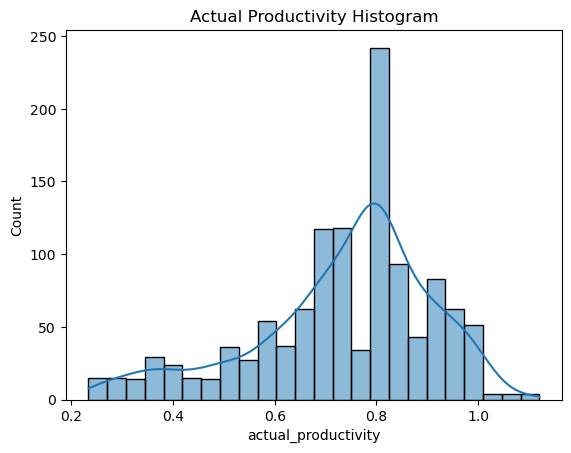

In [29]:
act_prod_hist = sns.histplot(data=df, x="actual_productivity", kde=True)
act_prod_hist.set_title('Actual Productivity Histogram')

C:\Python\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


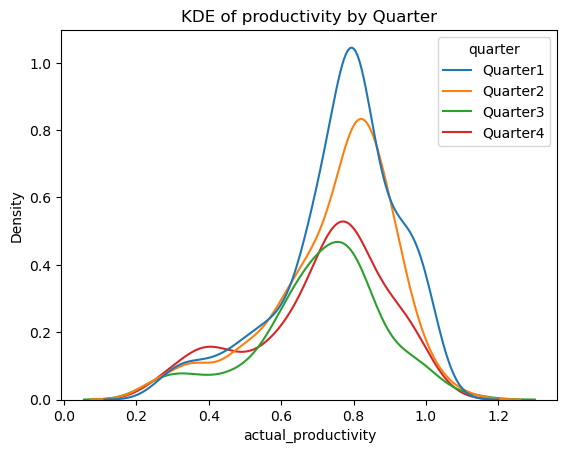

In [30]:
sns.kdeplot(data=df,x = 'actual_productivity',hue = 'quarter').set(title = 'KDE of productivity by Quarter');

__Conclusion__

Histogram suggests, actual_productivity in the first quarter is highest.

In [31]:
#4 Number count for sewing and finishing department
df1 = pd.DataFrame( df.groupby(['department']).size(), columns=['No. of Working Days'])
df1

,No. of Working Days
department,
finishing,506
sewing,691


In [32]:
#5 Mean and standard deviation of actual producivity for sewing and finishing Histogram plot of actual productivity based on both department and conclusion accordingly
print("Mean value for : ")
for x in df['department'].unique():
    print(x, ' : ', df[df['department'] == x]['actual_productivity'].mean())

Mean value for : 
sewing  :  0.7220130317105644
finishing  :  0.7529506683241106


In [33]:
print("Standard Deviation for : ")
for x in df['department'].unique():
    print(x, ' : ', df[df['department'] == x]['actual_productivity'].std())

Standard Deviation for : 
sewing  :  0.15478432010106702
finishing  :  0.19702098306497745


C:\Python\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


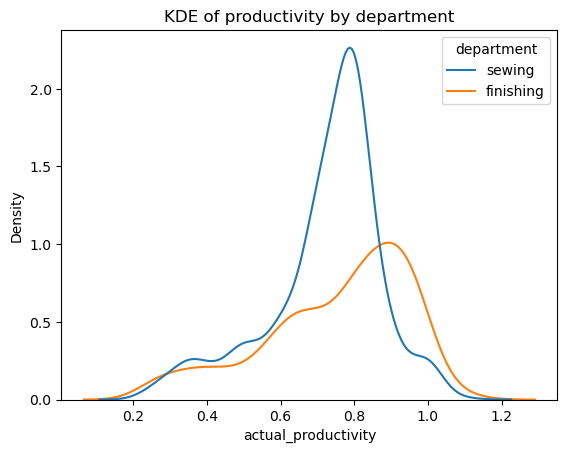

In [34]:
sns.kdeplot(data=df,x = 'actual_productivity',hue = 'department').set(title = 'KDE of productivity by department')
plt.show()

__Conclusion__
Finishing Department has higher productivityarter.

In [35]:
#6 Number count for  teams, smv across the year
team_count = df['team'].value_counts()
df3 = pd.DataFrame({'Team':list(team_count.index),'Count':team_count.values, })
df3

,Team,Count
0,8,109
1,2,109
2,1,105
3,4,105
4,9,104
5,10,100
6,12,99
7,7,96
8,3,95
9,6,94


In [36]:
smv_count = df['smv'].value_counts()
df4 = pd.DataFrame({'SMV':list(smv_count.index), 'SMV Count':smv_count.values})
df4

,SMV,SMV Count
0,3.94,192
1,2.90,108
2,22.52,103
3,30.10,79
4,4.15,76
...,...,...
65,48.68,1
66,54.56,1
67,41.19,1
68,49.10,1


C:\Python\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Python\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Python\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


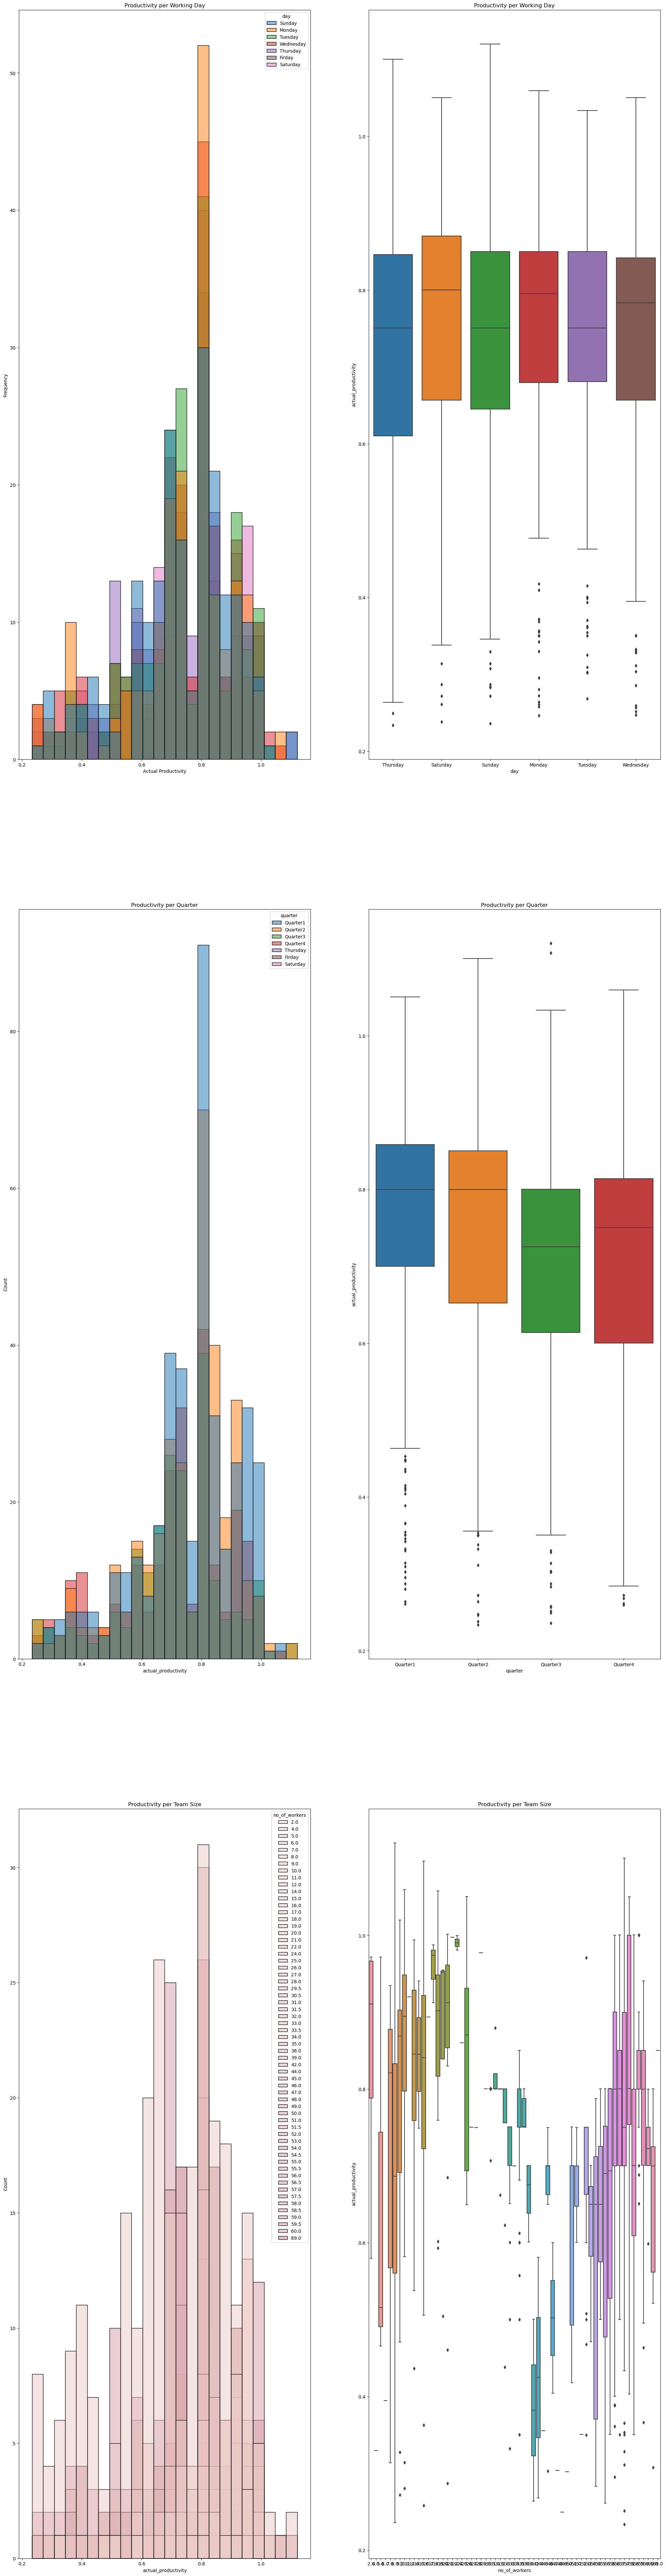

In [37]:
#7 Histogram & Box plot of actual productivity based on all working days, team size, quarterts and Conclude accordingly
plt.figure(figsize=(25,100))

plt.subplot(3,2,1)
plt.title('Productivity per Working Day')
sns.histplot(data=df,x='actual_productivity', fill=True, hue='day', hue_order=['Sunday', 'Monday', 'Tuesday','Wednesday','Thursday','Firday','Saturday'])
plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')

plt.subplot(3,2,2)
plt.title('Productivity per Working Day')
sns.boxplot(x=df.day, y=df.actual_productivity, orient='v')

plt.subplot(3,2,3)
plt.title('Productivity per Quarter')
sns.histplot(data=df,x='actual_productivity', fill=True, hue='quarter', hue_order=['Quarter1', 'Quarter2', 'Quarter3','Quarter4','Thursday','Firday','Saturday'])

plt.subplot(3,2,4)
plt.title('Productivity per Quarter')
sns.boxplot(x=df.quarter, y=df.actual_productivity, orient='v')

plt.subplot(3,2,5)
plt.title('Productivity per Team Size')
sns.histplot(data=df,x='actual_productivity', fill=True, hue='no_of_workers', hue_norm=(0,255))

plt.subplot(3,2,6)
plt.title('Productivity per Team Size')
sns.boxplot(x=df.no_of_workers, y=df.actual_productivity, orient='v')
plt.show()

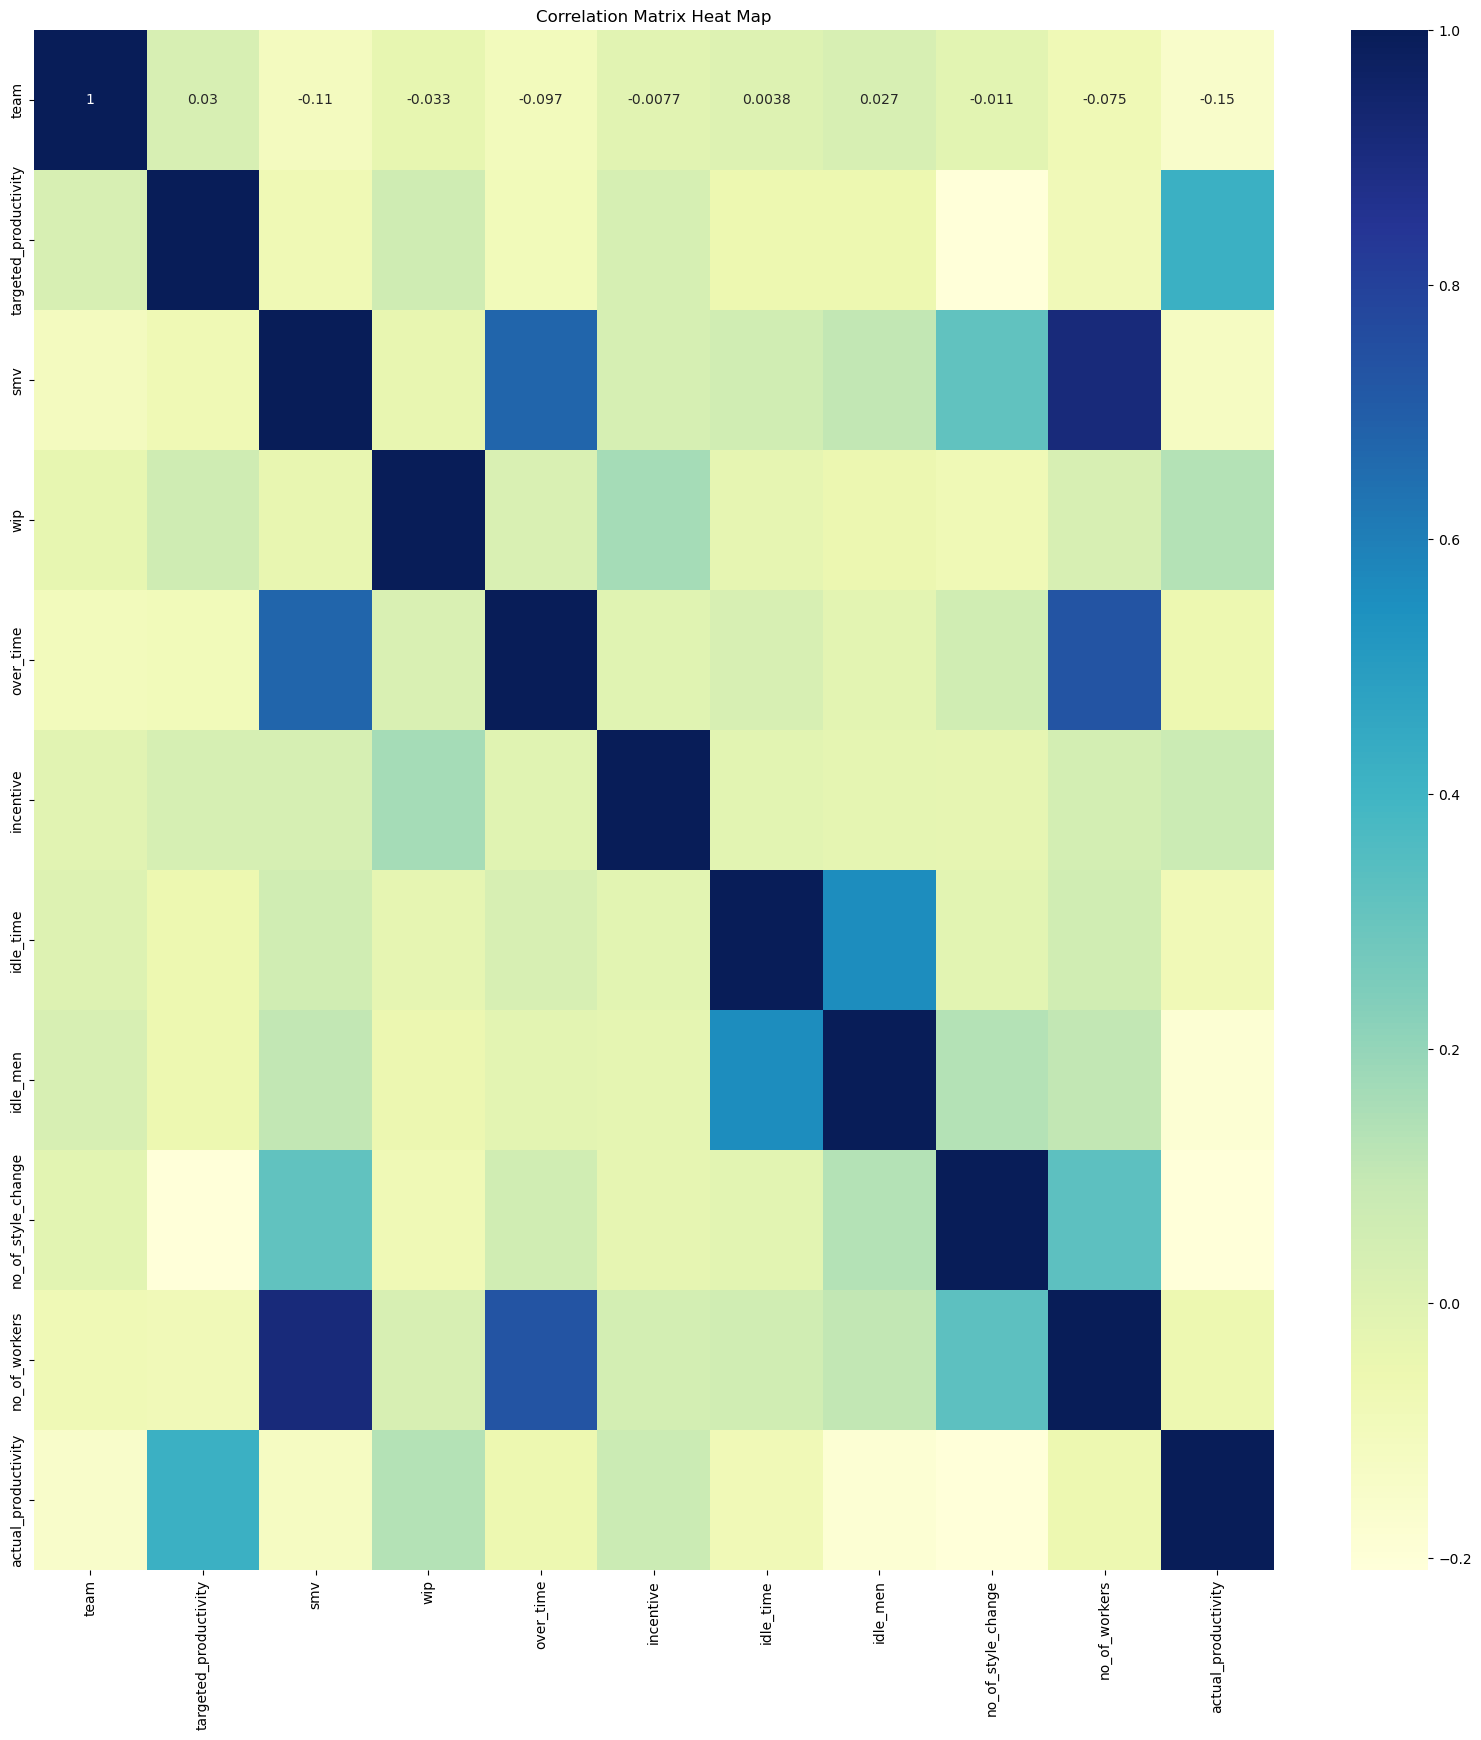

In [39]:
#8 Find correlation matrix and draw heat map for all variables
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(20,20))
sns.heatmap(data=correlation_matrix, cmap='YlGnBu', annot=True)
plt.title("Correlation Matrix Heat Map")
plt.show()


In [33]:
#9 Conclude (Is the company able to meet target, are they giving incentives based on producitivity, does overtime have any effect on productivity)
df['targeted_productivity'].value_counts().sort_index()

targeted_productivity
0.07      1
0.35     27
0.40      2
0.50     49
0.60     57
0.65     63
0.70    242
0.75    216
0.80    540
Name: count, dtype: int64

In [34]:
#10 Find the correlation between actual and target productivity for every quarter and for every department. What do you conclude
df.groupby('department')[['actual_productivity','targeted_productivity']].corr().unstack()

actual_productivity                       targeted_productivity  \
           actual_productivity targeted_productivity   actual_productivity   
department                                                                   
finishing                  1.0               0.09751               0.09751   
sewing                     1.0               0.69797               0.69797   

                                  
           targeted_productivity  
department                        
finishing                    1.0  
sewing                       1.0

In [35]:
df.groupby('quarter')[['actual_productivity','targeted_productivity']].corr().unstack()

actual_productivity                       targeted_productivity  \
         actual_productivity targeted_productivity   actual_productivity   
quarter                                                                    
Quarter1                 1.0              0.470833              0.470833   
Quarter2                 1.0              0.427164              0.427164   
Quarter3                 1.0              0.392637              0.392637   
Quarter4                 1.0              0.347594              0.347594   

                                
         targeted_productivity  
quarter                         
Quarter1                   1.0  
Quarter2                   1.0  
Quarter3                   1.0  
Quarter4                   1.0

In [ ]:
#11 Based on the above details of EDA and Descriptive statisitcs analysis what would you say could be the possible factors which can affect producitivity.

Hypothesis Testing 

12. Test using Z test (take a random sample of more than 30 and assume sigma =.1) whether the finishing department has achieved more acheived producitivity than .75 for a standard deviation of .1. State your null and alternative hypothesis. alpha value is .05

13. Test using Z test(take a random sample of more than 30 and assume sigma =.1) whether the sewing department has achieved more producitivit than .75 for a standard deviation of .1. State your null and alternative hypothesis. alpha value is .05.

14. Conduct a two sample t test (take a random sample more than 30) to check whether the finishing department has achieved more actual productivtiy than sewing     department. State your null and alternative hypothesis 

15. Conduct a two sample t (take a random sample less than 30) test to check whether the finishing department has achieved obtained higher incentive than sewing department, state your null and alternative hypothesis. In case test fails for normality check, then take a sample more than 30. 

16. The manager has asked you to classifiy low productivity as less than .5, medium between .5 and less than .75 and higher
    as greater than or equal to .75. He believes that the percentage of  actual producvity  in  sewing departemnt for   
    person classified as low is 30%, for medium is 40% and for high is 30%. USing chi square test can you prove whether his 
    hypothesis is right or not 

17. Based on the EDA analysis the manager has decided to find out whether different quarters are having an impact on actual productivity. Assuming normality of data conduct an analysis accordingly Conduct an ANOVA for comparing productivity for Quarter1, Quarter2, Quarter3, Quarter 4 and accordingly conclude (Assume data is normally distributed)

18. Based on the EDA analysis the manager has decided to find out whether different days  are having an impact on actual productivity. Assuming normality of data conduct an analysis accordingly Conduct an ANOVA for comparing productivity for Quarter1, Quarter2, Quarter3, Quarter 4 and accordingly conclude (Assume data is normally distributed)

19. In case the manager is interested whether day and quarters have an impact on actual producitivity, provide an analysis and identify which factors play a role in affecting productivty

20. Based on 17 eliminate one of the variabes which is not significant and reconduct analysis using deparment as another variable, what do you conclude.

21. Based on EDA and Hypothesis would you aggree or disaggree with the finding, also in addition summarize the findings based on both analysis and provide a recommendation on what you can thinking on improving the producitivity. 


In [37]:
#12
samp_size = 40
pop_mean  = 0.75 
pop_std   = 0.1 
std_err   = pop_std/np.sqrt(samp_size)

random_sample = df.loc[df['department']=='finishing','actual_productivity'].sample(samp_size,random_state=0)

#Sample mean
sample_mean = random_sample.mean()

z_sample = (sample_mean - pop_mean)/std_err

z_critical = stats.norm.isf(q=0.05)

print(z_critical)

1.6448536269514729


In [38]:
#13
samp_size = 50
pop_mean  = 0.75 
pop_std   = 0.1 
std_err   = pop_std/np.sqrt(samp_size)

random_sample = df.loc[df['department']=='sewing','actual_productivity'].sample(samp_size,random_state=0)

#Sample mean
sample_mean = random_sample.mean()

z_sample = (sample_mean - pop_mean)/std_err

z_critical = stats.norm.isf(q=0.05)

print(z_critical)

1.6448536269514729


In [40]:
#14
sewing_samp_size = 50
finishing_samp_size = 40

sewing_sample = df.loc[df['department']=='sewing','actual_productivity'].sample(sewing_samp_size,random_state=2)
finishing_sample = df.loc[df['department']=='finishing','actual_productivity'].sample(finishing_samp_size,random_state=2)

mean_sewing_sample = np.mean(sewing_sample)
std_sewing_sample = np.std(sewing_sample)
print('Mean for sewing sample :', round(mean_sewing_sample,2))
print('Standard deviation for sewing sample :',round(std_sewing_sample,2))

mean_finishing_sample = np.mean(finishing_sample)
std_finishing_sample = np.std(finishing_sample)
print('Mean for finishing sample :', round(mean_finishing_sample,2))
print('Standard deviation for finishing sample :',round(std_finishing_sample,2))

pooled_sd = np.sqrt((sewing_samp_size*std_sewing_sample**2 + finishing_samp_size*std_finishing_sample**2)/(sewing_samp_size+finishing_samp_size-2))

std_err = pooled_sd*np.sqrt(1/sewing_samp_size+1/finishing_samp_size)
print('Standard Error : ', std_err)

t_sample,p_value = stats.ttest_ind(finishing_sample,sewing_sample, alternative='greater')
print('T Sample : ', t_sample)
print('P Value : ', p_value)

Mean for sewing sample : 0.73
Standard deviation for sewing sample : 0.17
Mean for finishing sample : 0.76
Standard deviation for finishing sample : 0.2
Standard Error :  0.03959257090918946
T Sample :  0.6878681093345933
P Value :  0.2466725011200725


In [43]:
#15
sewing_samp_size = 25
finishing_samp_size = 20

sewing_sample = df.loc[df['department']=='sewing','incentive'].sample(sewing_samp_size,random_state=3)
finishing_sample = df.loc[df['department']=='finishing','incentive'].sample(finishing_samp_size,random_state=3)

_,p_value = stats.shapiro(sewing_sample)
print('P Value', p_value)

P Value 0.007128189783543348


In [44]:
sewing_samp_size = 50
finishing_samp_size = 40

sewing_sample = df.loc[df['department']=='sewing','incentive'].sample(sewing_samp_size,random_state=3)
finishing_sample = df.loc[df['department']=='finishing','incentive'].sample(finishing_samp_size,random_state=3)

t_sample,p_value = stats.ttest_ind(finishing_sample,sewing_sample, alternative='greater')
print('P Value', p_value)

P Value 0.8137957900684973


In [45]:
#16
df['actual_productivity_grp'] = pd.cut(df['actual_productivity'],[0,0.5,0.75,np.inf],right=False,labels = ['low','medium','high'])

observed = df['actual_productivity_grp'].value_counts().sort_index()
expected = pd.Series([0.3,0.4,0.3],index = observed.index)*len(df)
chi_square_sample = ((observed - expected)**2/expected).sum()
chi_square_critical = chi2.isf(0.05,df = 2)
chi_square_sample,p_value = chisquare(f_obs=observed.to_numpy(),f_exp=expected.to_numpy(),ddof = 2)

print('Observed : ', observed)
print('Expected : ',expected)
print('Chi Square critical : ',chi_square_critical)
print('P Value : ',p_value)

Observed :  actual_productivity_grp
low       133
medium    348
high      716
Name: count, dtype: int64
Expected :  actual_productivity_grp
low       359.1
medium    478.8
high      359.1
dtype: float64
Chi Square critical :  5.991464547107983
P Value :  nan


In [1]:
#17

In [46]:
#18
productivity_saturday = df.loc[df['day']=='Saturday','actual_productivity'].to_numpy()
productivity_sunday = df.loc[df['day']=='Sunday','actual_productivity'].to_numpy()
productivity_monday = df.loc[df['day']=='Monday','actual_productivity'].to_numpy()
productivity_tuesday = df.loc[df['day']=='Tuesday','actual_productivity'].to_numpy()
productivity_wednesday = df.loc[df['day']=='Wednesday','actual_productivity'].to_numpy()
productivity_thursday = df.loc[df['day']=='Thursday','actual_productivity'].to_numpy()

#Number of groups...
k = 6
#Number of samples...
N = len(df)

f_critical = stats.f.isf(q = 0.05,dfn = k-1,dfd = N-k)

f_sample,p_value = f_oneway(productivity_saturday,productivity_sunday,productivity_monday,productivity_tuesday,
                            productivity_wednesday,productivity_thursday)
print('F Sample : ',f_sample)

F Sample :  0.7121012009422417


In [3]:
#19

In [5]:
#20

In [ ]:
#21